In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor


In [4]:
df=pd.read_csv("/Users/kanchiharinathbadrinath/Downloads/archive (8)/Train.csv")

In [6]:
df.shape

(8523, 12)

In [7]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [8]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [10]:
df['Item_Weight'].mean()

12.857645184136183

In [11]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace = True)

In [12]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [14]:
mode_of_outlet_size = df.pivot_table(values = 'Outlet_Size', columns = 'Outlet_Type' , aggfunc=(lambda x: x.mode()[0]))

In [15]:
print(mode_of_outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [18]:
missing_values = df['Outlet_Size'].isnull()
print(missing_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [19]:
df.loc[missing_values, 'Outlet_Size'] = df.loc[missing_values, 'Outlet_Type'].apply(lambda x: mode_of_outlet_size)

In [21]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

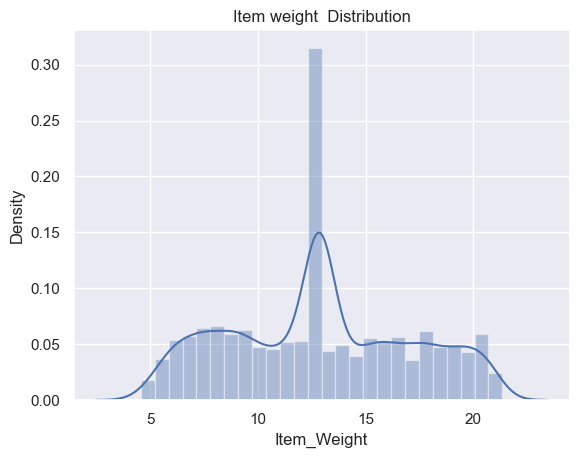

In [25]:
sns.set()
sns.distplot(df['Item_Weight'])
plt.title("Item weight  Distribution")
plt.show()

/Users/kanchiharinathbadrinath/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


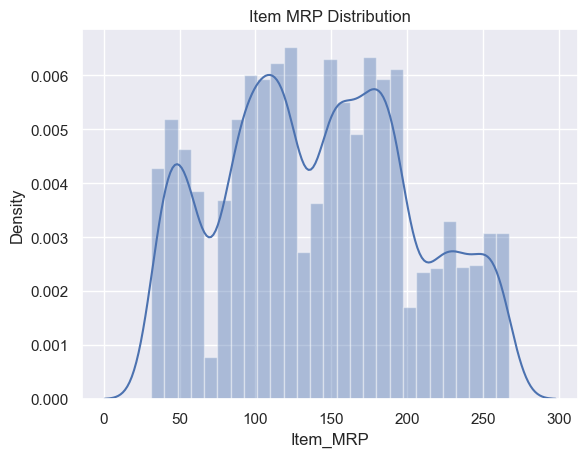

In [26]:
sns.distplot(df['Item_MRP'])
plt.title("Item MRP Distribution")
plt.show()

/Users/kanchiharinathbadrinath/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


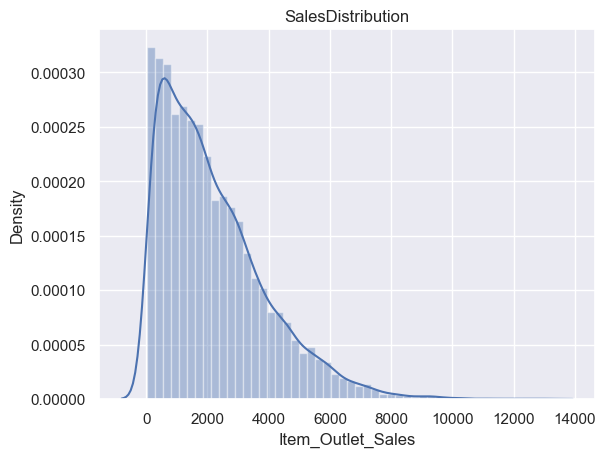

In [27]:
sns.distplot(df['Item_Outlet_Sales'])
plt.title("SalesDistribution")
plt.show()

/Users/kanchiharinathbadrinath/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


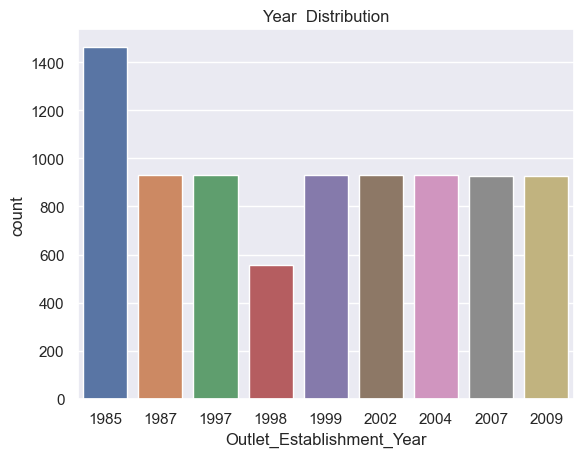

In [29]:
sns.countplot(df['Outlet_Establishment_Year'])
plt.title("Year  Distribution")
plt.show()

/Users/kanchiharinathbadrinath/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


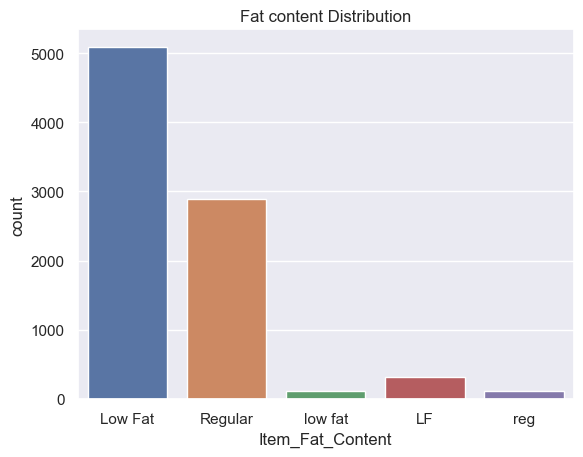

In [30]:
sns.countplot(df['Item_Fat_Content'])
plt.title("Fat content Distribution")
plt.show()

/Users/kanchiharinathbadrinath/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


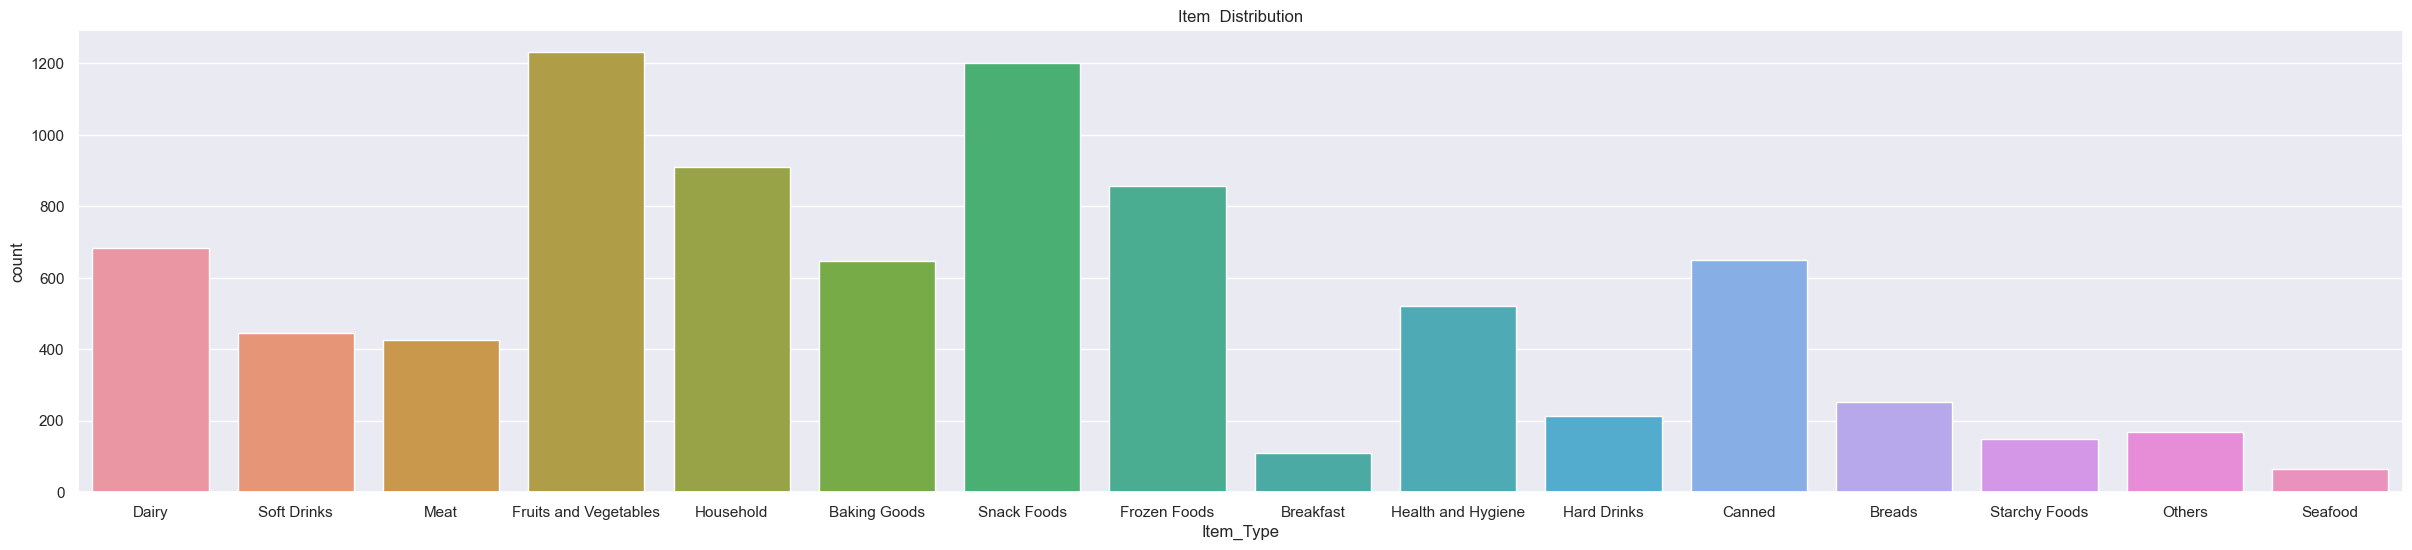

In [32]:
plt.figure(figsize=(30,6))
sns.countplot(df['Item_Type'])
plt.title("Item  Distribution")
plt.show()

In [33]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [37]:
df.replace({'Item_Fat_Content':{'low fat': 'Low Fat', 'LF' : 'Low Fat' ,'reg' : 'Regular'}}, inplace = True)

In [38]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [40]:
encoder = LabelEncoder()

In [41]:
  df['Outlet_Type'] = encoder.fit_transform(df['Outlet_Type'])
  df['Item_Identifier'] = encoder.fit_transform(df['Outlet_Type'])
  df['Item_Type'] = encoder.fit_transform(df['Outlet_Type'])
  df['Outlet_Identifier'] = encoder.fit_transform(df['Outlet_Type'])
  df['Outlet_Size'] = encoder.fit_transform(df['Outlet_Type'])
  df['Outlet_Location_Type'] = encoder.fit_transform(df['Outlet_Type'])
  df['Item_Fat_Content'] = encoder.fit_transform(df['Outlet_Type']) 
  
    
   
    

In [42]:
x= df.drop(columns = 'Item_Outlet_Sales',axis =1)
y = df['Item_Outlet_Sales']

In [44]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size = 0.3,random_state = 2)

In [45]:
print(x.shape,x_train.shape,x_test.shape)

(8523, 11) (5966, 11) (2557, 11)


In [46]:
print(y.shape,y_train.shape,y_test.shape)


(8523,) (5966,) (2557,)


In [47]:
regressor = XGBRegressor()

In [49]:
regressor.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [50]:
training_data_prediction = regressor.predict(x_train)

In [51]:
r2_train = metrics.r2_score(y_train,training_data_prediction)

In [52]:
print(r2_train)

0.8599818737534364


In [53]:
test_data_prediction = regressor.predict(x_test)

In [54]:
r2_test = metrics.r2_score(y_test,test_data_prediction)

In [55]:
print(r2_test)

0.5420215196765066
